# Predicción de Cancelación de Clientes en Telecom Interconnect

## 1. Descripción del proyecto

El presente proyecto, para la compañía de telecomunicaciones Interconnect, se centra en una tarea de clasificación para predecir la cancelación de clientes, con el fin de retener a estos clientes a través de ofrecimiento de códigos promocionales y opciones de planes especiales. En general en los negocios resulta más económico retener clientes que atraer nuevos clientes, por lo que este proyecto será de gran valor para la compañía.

El equipo de marketing ha recopilado algunos datos de sus clientes, incluyendo información sobre sus planes y contratos. A continuación se describen los servicios que ofrece la compañía y la descripción de los datos proporcionados.

### 1.1 Servicio de Interconnect

Interconnect proporciona principalmente dos tipos de servicios:

1. Comunicación por teléfono fijo. El teléfono se puede conectar a varias líneas de manera simultánea.
2. Internet. La red se puede configurar a través de una línea telefónica (DSL, *línea de abonado digital*) o a través de un cable de fibra óptica.

Algunos otros servicios que ofrece la empresa incluyen:

- Seguridad en Internet: software antivirus (*Protección De Dispositivo*) y un bloqueador de sitios web maliciosos (*Seguridad En Línea*).
- Una línea de soporte técnico (*Soporte Técnico*).
- Almacenamiento de archivos en la nube y backup de datos (*Backup On line*).
- Streaming de TV (*Streaming TV*) y directorio de películas (*Streaming Películas*)

La clientela puede elegir entre un pago mensual o firmar un contrato de 1 o 2 años. Puede utilizar varios métodos de pago y recibir una factura electrónica después de una transacción.

### 1.2 Descripción de los datos

Los datos consisten en archivos obtenidos de diferentes fuentes:

- `contract.csv` — información del contrato;
- `personal.csv` — datos personales del cliente;
- `internet.csv` — información sobre los servicios de Internet;
- `phone.csv` — información sobre los servicios telefónicos.

En cada archivo, la columna `customerID` (ID de cliente) contiene un código único asignado a cada cliente. La información del contrato es válida a partir del 1 de febrero de 2020.

### 1.3 Objetivo

El objetivo de este proyecto es crear un modelo de aprendizaje automático que, con base en la información histórica proporcionada por la compañía, sea capaz de predecir cuáles son los clientes que pudieran estar próximos a cancelar los servicios que tienen contratados con la compañía. Para ello se utilizará como variable objetivo la información que tiene la compañía sobre las personas que ya han cancelado su servicio, con ello podremos hacer una clasificación correcta y descubrir los patrones que llevan a los clientes a cancelar sus servicios.

## 2. Metodología

Abordaremos este proyecto siguiendo los pasos que se describen en la metodología CRISP-DM. Los cuales se enlistan a continuación:
- Entendimiento del negocio.
- Entendimiento de los datos.
- Preparación de los datos.
- Modelado.
- Evaluación.
- Despliegue.

El primer punto indica un entendimiento del negocio. Previamente hemos detallado el objetivo del proyecto, así como la relevancia para las operaciones del negocio. Como parte de este punto, es necesario desarrollar un plan de trabajo el cuál se detalla a continuación:

### 2.1 Plan de trabajo

El plan de trabajo se detalla contemplando todos los pasos de la metodología CRISP_DM a excepción del último que dejaremos fuera del alcance de este proyecto. Por lo tanto la serie de pasos y subpasos a seguir en este proyecto serán los siguientes:

1. Exploración inicial de los datos
   1. Revisión de la esctructura general y contenido inicial.
   2. Revisar valores ausentes, duplicados y errores de presentación.
   3. Corrección de errores y anomalías encontradas.
2. Análisis exploratorio de los datos (EDA).
   1. Unificación de datos en un solo conjunto de datos.
   2. Análisis estadístico de las principales características.
   3. Análisis de correlación entre características.
   4. Detección de valores atípicos.
   5. Evaluación de balance de clases.
3. Manipulación de datos e Ingeniería de Características.
   1. Codificación de variables categóricas.
   2. Estandarización de variables numéricas.
   3. Creación de nuevas características (si se detectan algunas necesarias)
4. Modelado
   1. Línea base (Dummy Classifier)
   2. Regresión logística (Logistic Regression)
   3. Árbol de decisión (Decission Tree Classifier)
   4. Bosque aleatorio (Random Forest Classifier)
   5. XGBoost
   6. Catboost
   7. LightGBM
5. Evaluación
   1. Evaluación de los 3 mejores modelos en el conjunto de prueba
   2. Selección del mejor modelo
6. Conclusiones generales


## 3. Exploración inicial de los datos
En esta sección haremos la ingesta inicial de los datos y revisaremos la estructura general de cada archivo y su contenido inicial.

### Importar librerías

In [1]:
# importar librerías

# librerías para manejo de datos y visualización
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import statistics as stats

# librerías para preparación y medición de los modelos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from numpy.random import RandomState


# librerías para la creación de los modelos
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

In [2]:
# Cargar los datos en dataframes
# Utilizaremos un bloque try - except para cargar los datos de manera local o del servidor
try:
    contract = pd.read_csv('./datasets/final_provider/contract.csv')
    internet = pd.read_csv('./datasets/final_provider/internet.csv')
    personal = pd.read_csv('./datasets/final_provider/personal.csv')
    phone = pd.read_csv('./datasets/final_provider/phone.csv')
except:
    contract = pd.read_csv('/datasets/final_provider/contract.csv')
    internet = pd.read_csv('/datasets/final_provider/internet.csv')
    personal = pd.read_csv('/datasets/final_provider/personal.csv')
    phone = pd.read_csv('/datasets/final_provider/phone.csv')

### 3.1 Revisión de la estructura general y contenido inicial

In [3]:
# Creamos un diccionario para facilitar las tareas de revisión
datasets = {'contract': contract, 'internet': internet, 'personal' : personal, 'phone': phone}

for name, data in datasets.items():
    print(f'\n Estructura general del conjunto \033[1m{name}\033[0m:\n')
    data.info()
    print('_' * 40)
    


 Estructura general del conjunto contract:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 440.3+ KB
________________________________________

 Estructura general del conjunto internet:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   ob

In [4]:
# Visualización de las primeras líneas de cada conjunto de datos
for name, data in datasets.items():
    print(f'\n Primeras líneas del conjunto \033[1m{name}\033[0m:\n')
    display(data.head())   


 Primeras líneas del conjunto contract:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.50
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65



 Primeras líneas del conjunto internet:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No



 Primeras líneas del conjunto personal:



,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No



 Primeras líneas del conjunto phone:



,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


In [5]:
# Visualización de las estadísticas incluyendo variables categóricas
for name, data in datasets.items():
    print(f'\n Estadísticas descriptivas del conjunto \033[1m{name}\033[0m:\n')
    display(data.describe(include='all'))


 Estadísticas descriptivas del conjunto contract:



,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
count,7043,7043,7043,7043,7043,7043,7043.000000,7032.000000
unique,7043,77,5,3,2,4,NaN,NaN
top,3186-AJIEK,2014-02-01,No,Month-to-month,Yes,Electronic check,NaN,NaN
freq,1,366,5174,3875,4171,2365,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,2283.300441
std,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,2266.771362
min,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,18.800000
25%,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,401.450000
50%,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,1397.475000
75%,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,3794.737500



 Estadísticas descriptivas del conjunto internet:



,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,3186-AJIEK,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785



 Estadísticas descriptivas del conjunto personal:



,customerID,gender,SeniorCitizen,Partner,Dependents
count,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2
top,3186-AJIEK,Male,NaN,No,No
freq,1,3555,NaN,3641,4933
mean,NaN,NaN,0.162147,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN



 Estadísticas descriptivas del conjunto phone:



,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,3186-AJIEK,No
freq,1,3390


### 3.2 Revisar valores ausentes, duplicados y errores de presentación.

#### 3.2.1 Revisión de valores ausentes
En la sección anterior podemos ver tanto en la estructura general de cada conjuntos de datos como en las estadísticas descriptivas que no tenemos valores ausentes, a excepción de la columna `TotalCharges` del conjunto de datos `contract` donde tenemos 11 valores ausentes.

También podemos notar rápidamente que el conjunto de datos `internet` contiene **1526 registros menos** que el conjunto de datos `personal`, una situación similar se presenta en el conjunto de datos `phone` donde tenemos **682 registros menos** en comparación con el conjunto de datos `personal`. Esto podría deberse a que algunos usuarios solo tienen contratado el servicio de internet y no el de teléfono, y de manera similar, algunos tendrían contratado solo servicio de teléfono pero no de internet. A continuación haremos una exploración utilizando el `customerID` de cada conjunto para corroborar este supuesto.

In [6]:
# Obtener los customerID que están en personal pero no en internet
missing_internet = set(personal['customerID']) - set(internet['customerID'])

# Verificar cuántos de estos clientes tienen servicio telefónico
phone_only = set(phone['customerID']).intersection(missing_internet)

# Mostrar resultados
print(f"Clientes sin servicio de internet: {len(missing_internet)}")
print(f"De estos, tienen servicio telefónico: {len(phone_only)}")
print(f"Porcentaje de clientes sin internet que tienen teléfono: {(len(phone_only)/len(missing_internet))*100:.2f}%")

Clientes sin servicio de internet: 1526
De estos, tienen servicio telefónico: 1526
Porcentaje de clientes sin internet que tienen teléfono: 100.00%


In [7]:
# Obtener los customerID que están en personal pero no en phone
missing_phone = set(personal['customerID']) - set(phone['customerID'])

# Verificar cuántos de estos clientes tienen servicio de internet
internet_only = set(internet['customerID']).intersection(missing_phone)

# Mostrar resultados
print(f"Clientes sin servicio de teléfono: {len(missing_phone)}")
print(f"De estos, tienen servicio de internet: {len(internet_only)}")
print(f"Porcentaje de clientes sin teléfono que tienen internet: {(len(internet_only)/len(missing_phone))*100:.2f}%")

Clientes sin servicio de teléfono: 682
De estos, tienen servicio de internet: 682
Porcentaje de clientes sin teléfono que tienen internet: 100.00%


In [8]:
# Revisar los valores ausentes en la columna TotalCharges
display(datasets['contract'].loc[datasets['contract']['TotalCharges'].isna()])

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,NaN
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,NaN
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,NaN
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,NaN
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,NaN
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,NaN
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,NaN
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,NaN
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,NaN


Observaciones
- Los datos ausentes en los conjuntos de datos `internet` y `phone` se deben al tipo de servicio que el usuario tiene contratado, al momento de hacer la combinación de todos los conjuntos de datos se abordará esta situación para tener los registros completos.
- Los valores ausentes en la columna `TotalCharges` se deben a que el usuario recientemente contrató el servicio, vemos también que todos coinciden en que el tipo de contrato es de uno o dos años en lugar de mes a mes, por lo que no se ha capturado un total de cargos, sin embargo, dado que es un solo mes, se puede copiar la información de la columna `MonthlyCharges` para rellenar estos valores ausentes.

#### 3.2.2 Revisión de valores duplicados
De la información obtenida en la sección 3.1 en las estadísticas descriptivas es claro que no tenemos ID's de usuarios duplicados en ningún conjunto de datos. Buscar valores duplicados omitiendo la columna `customerID` en este caso no tendría sentido ya que sería completamente normal encontrar comportamientos similares de los clientes. Por lo tanto, podemos concluir que no hay valores duplicados.

#### 3.2.3 Errores de presentación
En la sección 3.1 podemos identificar rápidamente algunas situaciones que se deben corregir y se enlistan a continuación:
- **Nombres de columnas:** Todos los nombres de columnas están en una nomenclatura distinta a la preferida, que es snake_case.
- **Tipos de datos:** Encontramos varias columnas con tipos de datos que no son los adecuados y se detallan a continuación:
  - `BeginDate` - cambiar a tipo `datetime`
  - `EndDate` - esta columna contiene la información de nuestra variable objetivo pero tiene la información mezclada entre fechas y strings.
  - `PaperlessBilling`, `OnlineSecurity`, `OnlineBackup`, `DeviceProtection`, `TechSupport`, `StreamingTV`, `StreamingMovies`, `Partner`, `Dependents` y `MultipleLines` - tienen información booleana presentada como strings. Sin embargo, al estar como variables categóricas, se convertirán a booleanas en el proceso de codificación de variables categóricas.
  - `SeniorCitizen` - parece tener información booleana presentada como enteros.



### 3.3 Corrección de errores y anomalías encontradas
En esta sección se corregirán los puntos señalados en la sección 3.2.3

#### 3.3.1 Corrección de nomenclatura en los títulos de columnas

In [9]:
# Cambiar títulos de columnas a nomenclatura snake_case
for data in datasets.values():
    # buscar una letra minúscula seguida de una mayúscula y reemplazar esa coincidencia con la primera letra seguida de un guión bajo y la segunda letra
    data.columns = [re.sub(r'([a-z])([A-Z])', r'\1_\2', col).lower() for col in data.columns]
    print(data.columns)

Index(['customer_id', 'begin_date', 'end_date', 'type', 'paperless_billing',
       'payment_method', 'monthly_charges', 'total_charges'],
      dtype='object')
Index(['customer_id', 'internet_service', 'online_security', 'online_backup',
       'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies'],
      dtype='object')
Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents'], dtype='object')
Index(['customer_id', 'multiple_lines'], dtype='object')


#### 3.3.2 Corrección de tipos de datos

In [10]:
# Cambiar la columna begin_date a tipo de datos 'datetime'
datasets['contract']['begin_date'] = pd.to_datetime(datasets['contract']['begin_date'], format='%Y-%m-%d')

# Creación de una nueva columna con el valor objetivo para nuestros modelos
datasets['contract'].loc[datasets['contract']['end_date'] == 'No', 'churn'] = 0
datasets['contract'].loc[datasets['contract']['end_date'] != 'No', 'churn'] = 1
datasets['contract']['churn'] = datasets['contract']['churn'].astype('int8')

In [12]:
# Cambiar la columna end_date a tipo de datos 'datetime'
# Primero reemplazamos los valores 'No' por cadenas vacías para evitar errores al convertir
datasets['contract']['end_date'] = datasets['contract']['end_date'].replace('No', '')
datasets['contract']['end_date'] = pd.to_datetime(datasets['contract']['end_date'], format='ISO8601')
datasets['contract']['end_date'].unique()

<DatetimeArray>
[                'NaT', '2019-12-01 00:00:00', '2019-11-01 00:00:00',
 '2019-10-01 00:00:00', '2020-01-01 00:00:00']
Length: 5, dtype: datetime64[ns]

In [13]:
# Verificamos las correcciones
print(datasets['contract'].info())
display(datasets['contract'].head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7032 non-null   float64       
 8   churn              7043 non-null   int8          
dtypes: datetime64[ns](2), float64(2), int8(1), object(4)
memory usage: 447.2+ KB
None


,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,0
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [14]:
# Revisar la columna 'senior_citizen' para corroborar que la información es booleana
print(datasets['personal']['senior_citizen'].unique())

[0 1]


In [15]:
# Convertir la columna 'senior_citizen' a tipo boolean
datasets['personal']['senior_citizen'] = datasets['personal']['senior_citizen'].astype('bool')

#### 3.3.3 Relleno de valores ausentes en la columna 'total_charges'

In [16]:
# Guardar los registros con valores ausentes para realizar la comprobación
ausentes = datasets['contract'].loc[datasets['contract']['total_charges'].isna()]

# Rellenar los valores ausentes en la columna 'TotalCharges'
datasets['contract']['total_charges'] = datasets['contract']['total_charges'].fillna(datasets['contract']['monthly_charges'])

# Comprobar la operación de relleno
display(datasets['contract'][datasets['contract']['customer_id'].isin(ausentes['customer_id'])])
print("Valores ausentes en la columna 'total_charges':", datasets['contract']['total_charges'].isna().sum())

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,churn
488,4472-LVYGI,2020-02-01,NaT,Two year,Yes,Bank transfer (automatic),52.55,52.55,0
753,3115-CZMZD,2020-02-01,NaT,Two year,No,Mailed check,20.25,20.25,0
936,5709-LVOEQ,2020-02-01,NaT,Two year,No,Mailed check,80.85,80.85,0
1082,4367-NUYAO,2020-02-01,NaT,Two year,No,Mailed check,25.75,25.75,0
1340,1371-DWPAZ,2020-02-01,NaT,Two year,No,Credit card (automatic),56.05,56.05,0
3331,7644-OMVMY,2020-02-01,NaT,Two year,No,Mailed check,19.85,19.85,0
3826,3213-VVOLG,2020-02-01,NaT,Two year,No,Mailed check,25.35,25.35,0
4380,2520-SGTTA,2020-02-01,NaT,Two year,No,Mailed check,20.00,20.00,0
5218,2923-ARZLG,2020-02-01,NaT,One year,Yes,Mailed check,19.70,19.70,0
6670,4075-WKNIU,2020-02-01,NaT,Two year,No,Mailed check,73.35,73.35,0


Valores ausentes en la columna 'total_charges': 0


## 4 Análisis Exploratorio de Datos (EDA)

### 4.1 Unificación de datos en un solo conjunto de datos

In [17]:
# Utilizaremos un outer merge para combinar cada conjunt de datos en uno solo

full_data = pd.DataFrame(columns=['customer_id'])

for data in datasets.values():
    full_data = full_data.merge(data, on='customer_id', how='outer')
display(full_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        7043 non-null   object        
 1   begin_date         7043 non-null   datetime64[ns]
 2   end_date           1869 non-null   datetime64[ns]
 3   type               7043 non-null   object        
 4   paperless_billing  7043 non-null   object        
 5   payment_method     7043 non-null   object        
 6   monthly_charges    7043 non-null   float64       
 7   total_charges      7043 non-null   float64       
 8   churn              7043 non-null   int8          
 9   internet_service   5517 non-null   object        
 10  online_security    5517 non-null   object        
 11  online_backup      5517 non-null   object        
 12  device_protection  5517 non-null   object        
 13  tech_support       5517 non-null   object        
 14  streamin

None

In [18]:
# Revisamos nuevamente los datos faltantes del conjunto de datos completo
full_data.isna().sum()

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn                   0
internet_service     1526
online_security      1526
online_backup        1526
device_protection    1526
tech_support         1526
streaming_tv         1526
streaming_movies     1526
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines        682
dtype: int64

In [19]:
# Antes de rellenar los valores ausentes, crearemos una nueva columna que indique los servicios básicos contratados por el cliente, es decir, si tiene servicio de internet, teléfono o ambos.
full_data['basic_services'] = 'both'
full_data.loc[full_data['internet_service'].isna() & full_data['multiple_lines'].notna(), 'basic_services'] = 'phone'
full_data.loc[full_data['internet_service'].notna() & full_data['multiple_lines'].isna(), 'basic_services'] = 'internet'
# Verificamos la creación de la nueva columna
display(full_data['basic_services'].value_counts())

basic_services
both        4835
phone       1526
internet     682
Name: count, dtype: int64

In [20]:
# Dado que los valores ausentes en la columna 'internet_service' se deben a que esos usuarios solo tienen contrado plan de teléfono, llenaremos los valores ausentes con la leyenda 'Sin suscripción'
full_data['internet_service'] = full_data['internet_service'].fillna('Sin suscripción')

# Para facilitar los análisis, llenaremos todos los valores ausentes de los servicios adicionales con la leyenda 'Sin suscripción'
additional_services = ['online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']
for service in additional_services:
    full_data[service] = full_data[service].fillna('Sin suscripción')

# Verificamos que no haya valores ausentes
print(full_data.isna().sum())

customer_id             0
begin_date              0
end_date             5174
type                    0
paperless_billing       0
payment_method          0
monthly_charges         0
total_charges           0
churn                   0
internet_service        0
online_security         0
online_backup           0
device_protection       0
tech_support            0
streaming_tv            0
streaming_movies        0
gender                  0
senior_citizen          0
partner                 0
dependents              0
multiple_lines          0
basic_services          0
dtype: int64


### 4.2 Análisis estadístico de las principales características

En esta sección se revisarán las estadísticas descriptivas de cada una de las variables, así como la correlación entre ellas. Se espera que el análisis estadístico nos ayude a identificar patrones y relaciones entre las variables, lo que puede ser útil para la creación de nuevas características o para la selección de variables relevantes para el modelo.

#### 4.2.1 Comportamiento general de los clientes

In [21]:
# Definimos una función para graficar las variables categóricas

def plot_cat(df, x, title, xticks, ax, hue='churn', legend=False):
    # Calcular el conteo normalizado
    normalized_count = df[[x, hue]].value_counts(normalize=True).reset_index(name='percentage')
    normalized_count['percentage'] = normalized_count['percentage'] * 100
    # Generar el gráfico
    sns.barplot(data=normalized_count, x=x, y='percentage', hue=hue, errorbar=None, ax=ax, legend=legend)
    # Agregar título y etiquetas
    ax.set_title(title, pad=10) 
    ax.set_xticks([x for x in range(len(xticks))])
    ax.set_xticklabels(xticks, rotation=0)
    ax.set_xlabel('')
    ax.set_ylabel('Porcentaje', fontweight='bold')
    # Agregar etiquetas de valor en cada barra
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2)


##### 4.2.1.1 Exploración de características personales y la deserción de los clientes.

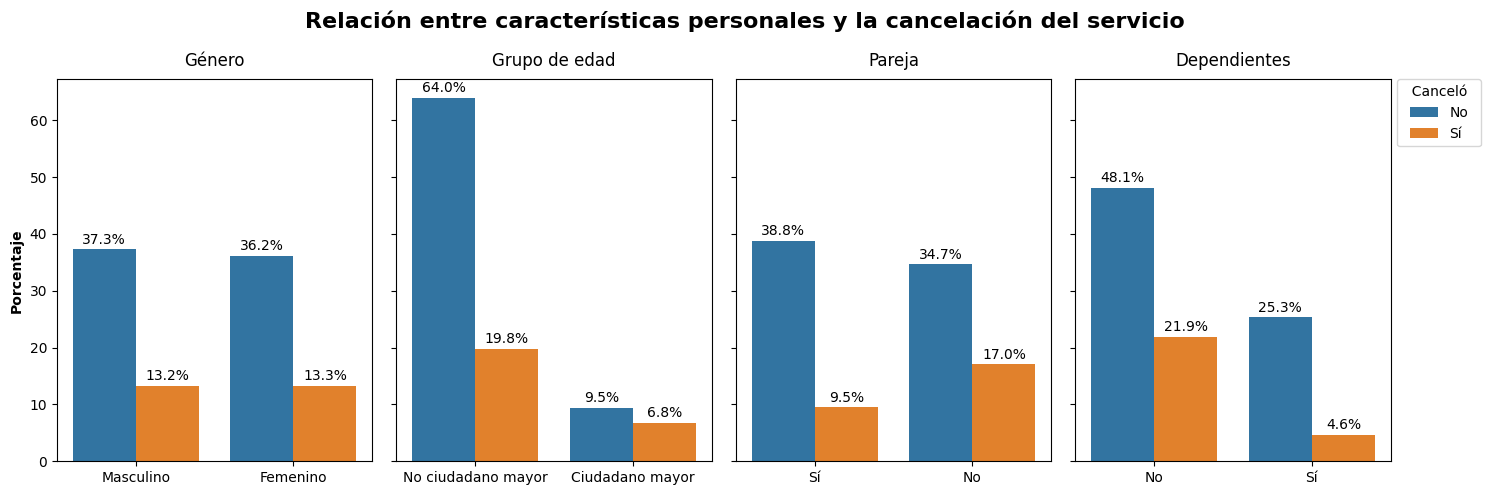

In [22]:
# Exploramos las características gender, senior_citizen, partner y dependents

fig, axs = plt.subplots(1, 4, figsize=(15, 5), sharey=True)
plt.suptitle('Relación entre características personales y la cancelación del servicio', fontsize=16, fontweight='bold')
plot_cat(full_data, 'gender', 'Género', ['Masculino', 'Femenino'], axs[0])
plot_cat(full_data, 'senior_citizen', 'Grupo de edad', ['No ciudadano mayor', 'Ciudadano mayor'], axs[1])
plot_cat(full_data, 'partner', 'Pareja', ['Sí', 'No'], axs[2])
plot_cat(full_data, 'dependents', 'Dependientes', ['No', 'Sí'], axs[3])
plt.legend(title='  Canceló  ', labels=['No', 'Sí'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

En estas gráficas podemos observar que hay una distribución uniforme en cuanto a hombres y mujeres, tanto del uso de los servicios como en la tasa de cancelación de los mismos. En cuanto al grupo de edad, notamos que los adultos mayores son la minoría de los clientes y también tienen tasas de cancelación menores. La tasa de cancelación para el grupo que no son adultos mayores es considerable. También podemos observar que los clientes que no tienen una pareja son más propensos a cancelar sus servicios y por último, podemos nota que los clientes que no tienen dependientes muestran una tasa de cancelación considerablemente más elevada que aquellos que sí tienen dependientes.

Ahora exploraremos las características del tipo de contrato en cuanto a los plazos de pago, el método de facturación y el método de pago.

##### 4.2.1.2 Exploración de característcias de contrato y deserción de los clientes

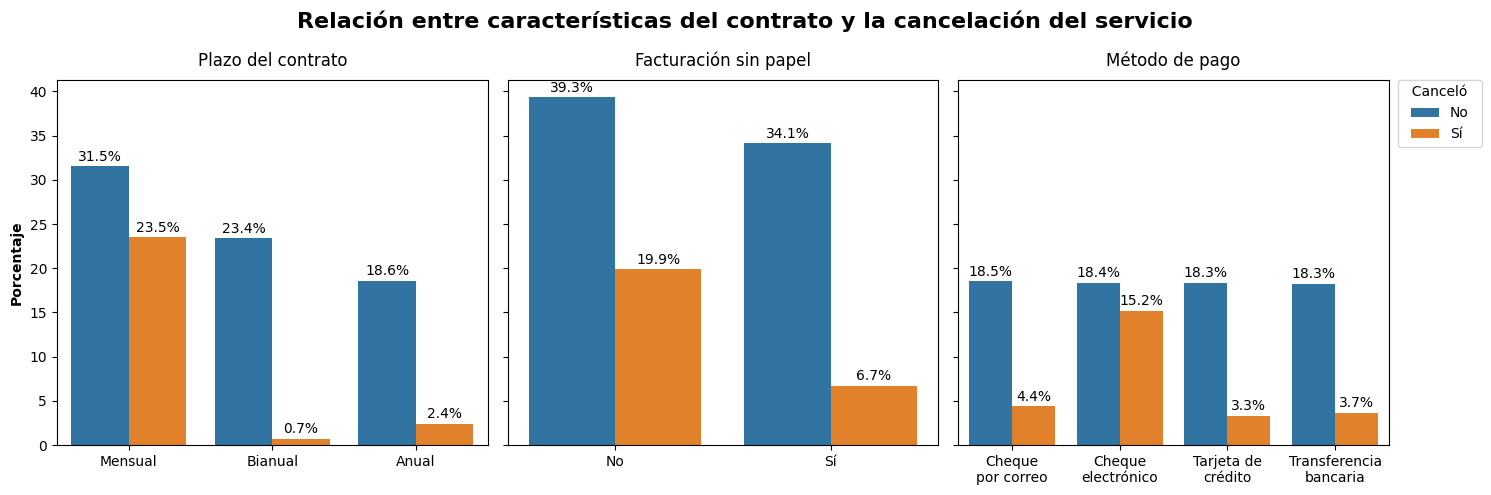

In [23]:
# Exploramos las características categóricas del contrato: type, paperless_billing y payment_method

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
plt.suptitle('Relación entre características del contrato y la cancelación del servicio', fontsize=16, fontweight='bold')
plot_cat(full_data, 'type', 'Plazo del contrato', ['Mensual', 'Bianual', 'Anual'], axs[0])
plot_cat(full_data, 'paperless_billing', 'Facturación sin papel', ['No', 'Sí'], axs[1])
plot_cat(full_data, 'payment_method', 'Método de pago', ['Cheque\npor correo', 'Cheque\nelectrónico', 'Tarjeta de\ncrédito', 'Transferencia\nbancaria'], axs[2])
plt.legend(title='  Canceló  ', labels=['No', 'Sí'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

Como era de esperarse, vemos una tasa de cancelación más elevada en los plazos de pago mes a mes, seguida de los anuales y por último los bianuales, desafortunadamente, la gran mayoría de los clientes, utilizan el plazo mensual. En cuanto a la facturación sin papel, la mayoría de los clientes no la utiliza y vemos que en esos casos la tasa de cancelación es mayor que en aquellos clientes que sí utilizan la facturación sin papel. Por último, podemos observar que el método de pago por cheque electrónico, es el que tienen una mayor tasa de cancelación comparada con los demás métodos de pago.

Ahora haremos una exploración de los servicios básicos contratados, es decir si tienen teléfono e internet o solo alguno de ellos y cómo se relacionan con la tasa de cancelación.

##### 4.2.1.3 Exploración de características de servicios básicos y adicionales y la deserción de los clientes

In [24]:
# Exploramos las características de los servicios básicos contratados.
services_usage_churn_rate = round(full_data[['basic_services', 'churn']].value_counts(normalize=True) * 100, 2).reset_index(name='percentage')
services_usage_churn_rate['churn'] = services_usage_churn_rate['churn'].map({0: 'No', 1: 'Sí'})
services_usage_churn_rate['basic_services'] = services_usage_churn_rate['basic_services'].map(
    {'both': 'Ambos servicios', 'phone': 'Solo teléfono', 'internet': 'Solo internet'})   

fig = px.bar(services_usage_churn_rate, 
             x='basic_services', 
             y='percentage',
             color='churn',
             labels={'churn': 'Canceló'},
             width=800,
             height=400,
             color_discrete_map={'Sí': 'orange', 'No': 'steelblue'})

fig.update_layout(xaxis_title='',
    yaxis_title='<b>Porcentaje</b>',
    title={'text': '<b>Relación entre los servicios básicos y la cancelación del servicio</b>', 'x': 0.5},
    yaxis_range=[0,100],
    barmode='stack',
    margin=dict(b=20))
fig.show()

En esta gráfica podemos notar que la gran mayoría de los clientes tiene contratados ambos servicios, es decir teléfono e internet y en este mismo grupo es donde tenemos la tasa de cancelación más alta. También podemos notar que hay menos clientes que solo contratan internet, comparados con aquellos que solo contratan servicio de telefonía y en ambos casos las tasas de cancelación son relativamente bajas.

Pasaremos ahora a explorar la relación entre los servicios adicionales y la tasa de cancelación. Comenzaremos por averiguar cómo es la proporción de clientes que usan los servicios adicionales tanto de internet como el servicio de múltiples líneas para el caso de telefonía.

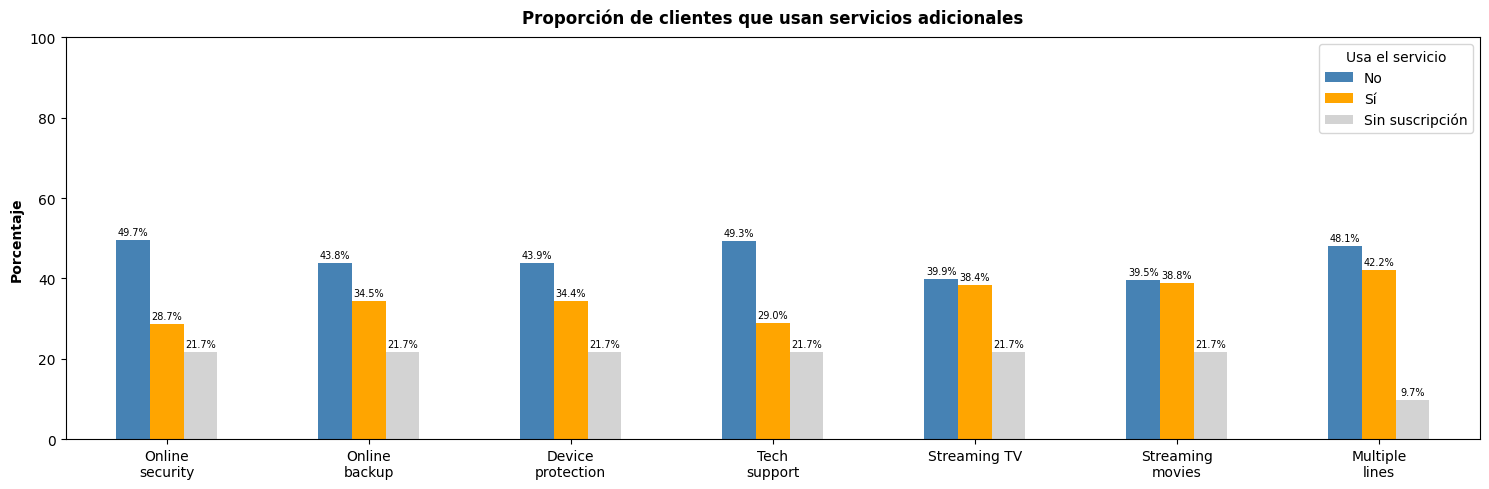

In [25]:
# Proporción de clientes que usan cada uno de los servicios adicionales
additional_services_usage_count = round(full_data[additional_services].apply(lambda x: x.value_counts(normalize=True)) * 100, 2)
ax = additional_services_usage_count.T.plot(kind='bar', color=['steelblue', 'orange', 'lightgray'], figsize=(15, 5))

plt.title('Proporción de clientes que usan servicios adicionales', pad=10, fontsize=12, fontweight='bold')
plt.xlabel('')
plt.ylabel('Porcentaje', fontweight='bold')
plt.ylim(0, 100)
plt.legend(title='Usa el servicio', labels=['No', 'Sí', 'Sin suscripción'], loc='upper right')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Online\nsecurity', 'Online\nbackup', 'Device\nprotection', 'Tech\nsupport', 'Streaming TV', 'Streaming\nmovies', 'Multiple\nlines'], rotation=0)
# Agregar etiquetas de valor en cada barra
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=2, fontsize=7)
plt.tight_layout()
plt.show()

En el gráfico anterior podemos ver que en todos los servicios es mayor la cantidad de clientes que no utilizan algún servicio adicional, sin embargo, el porcentaje de clientes que sí utilian los servicios adicionales es bastante considerable. En cuanto a los servicios de streaming tanto de televisión como de películas, es casi parejo en cuanto al porcentaje de clientes que lo utilizan y los que no. Es importante notar que los servicios de seguridad en línea y soporte técnico, son los que tienen menor utilización. Por último, podemos ver que la proporción de clientes que sí utliza múltiples líneas de teléfono es ligeramente menor al porcentaje de clientes que no las utilizan.

Pasemos ahora a explorar la tasa de cancelación en cada uno de estos servicios.

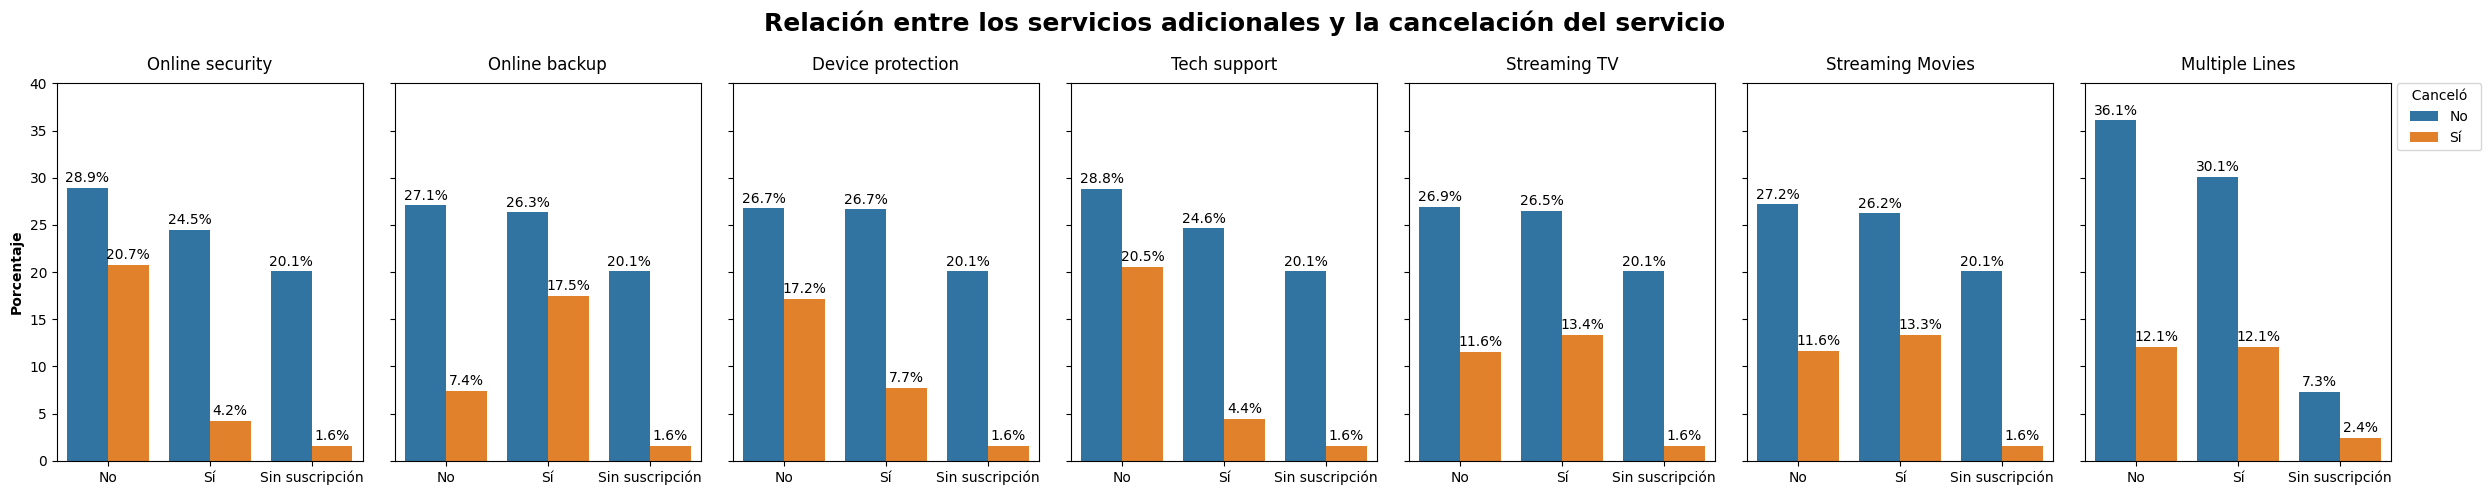

In [26]:
# Exploramos la relación entre los servicios adicionales y la cancelación del servicio

fig, axs = plt.subplots(1, 7, figsize=(25, 5), sharey=True)
plt.suptitle('Relación entre los servicios adicionales y la cancelación del servicio', fontsize=18, fontweight='bold')
plot_cat(full_data, 'online_security', 'Online security', ['No', 'Sí', 'Sin suscripción'], axs[0])
plot_cat(full_data, 'online_backup', 'Online backup', ['No', 'Sí', 'Sin suscripción'], axs[1])
plot_cat(full_data, 'device_protection', 'Device protection', ['No', 'Sí', 'Sin suscripción'], axs[2])
plot_cat(full_data, 'tech_support', 'Tech support', ['No', 'Sí', 'Sin suscripción'], axs[3])
plot_cat(full_data, 'streaming_tv', 'Streaming TV', ['No', 'Sí', 'Sin suscripción'], axs[4])
plot_cat(full_data, 'streaming_movies', 'Streaming Movies', ['No', 'Sí', 'Sin suscripción'], axs[5])
plot_cat(full_data, 'multiple_lines', 'Multiple Lines', ['No', 'Sí', 'Sin suscripción'], axs[6])
plt.ylim(0, 40)
plt.legend(title='  Canceló  ', labels=['No', 'Sí'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

En estas gráficos podemos notar varios aspectos interesantes. En la primer gráfico podemos ver que los clientes que utilizan el servicio de seguridad en línea tienen una tasa de cancelación mucho más baja que aquellos que no lo utilizan. Contrario a lo que vemos en la segunda gráfica que nos muestra que aquellos clientes que utilizan el servicio de respaldo en línea, tienden a cancelar el servicio en mayor proporción que los clientes que no lo utilizan. En cuanto a la protección del dispositivo, observamos también una tasa de cancelación más baja en los clientes que sí utilizan el servicio. En cuanto al servicio de soporte técnico es muy interesante notar la tasa de cancelación tan baja en comparación con aquellos que no utilizan este servicio, por lo que podríamos sospechar que este servicio es un buen apalancador para retener a los clientes. En cuanto a los servicios de streaming, tanto de televisión como de películas, la tasa de cancelación es muy similar en los clientes que lo utilizan y los que no, y por último, en el servicio de telefonía, la tasa de cancelación es prácticamente la misma aunque hay un porcentaje ligeramente mayor de clientes que no utilizan este servicio.

Ahora exploraremos la tasa de cancelación por tipo de conexión a internet, recordando que la compañía ofrece dos tipos: DSL y Fibra óptica.

In [27]:
# Exploramos la relación entre el tipo de servicio de internet y la cancelación del servicio
internet_service_churn_rate = round(full_data[['internet_service', 'churn']].value_counts(normalize=True) * 100, 2).reset_index(name='percentage')
internet_service_churn_rate['churn'] = internet_service_churn_rate['churn'].map({0: 'No', 1: 'Sí'})

fig = px.bar(internet_service_churn_rate, 
             x='internet_service', 
             y='percentage',
             color='churn',
             labels={'churn': 'Canceló'},
             width=800,
             height=400,
             color_discrete_map={'Sí': 'orange', 'No': 'steelblue'})

fig.update_layout(xaxis_title='',
    yaxis_title='<b>Porcentaje</b>',
    title={'text': '<b>Relación entre el tipo de servicio de internet y la cancelación del servicio</b>', 'x': 0.5, 'y': 0.93},
    yaxis_range=[0,50],
    barmode='stack',
    margin=dict(b=20))
fig.show()

Sorpresivamente vemos una tasa de cancelación considerablemente mayor en los clientes que utilizan fibra óptica con respecto a los que utilizan conexión DSL. La conexión por fibra óptica es una tecnología más reciente que la conexión por DSL y por tanto también es más rápida. Podríamos sospechar que los clientes han experimentado algunos problemas con este tipo de conexión y por ello hay más cancelaciones. Para revisar esta suposición podemos comparar la tasa de cancelación entre los que utilizan fibra óptica y además tienen el servicio de soporte técnico.

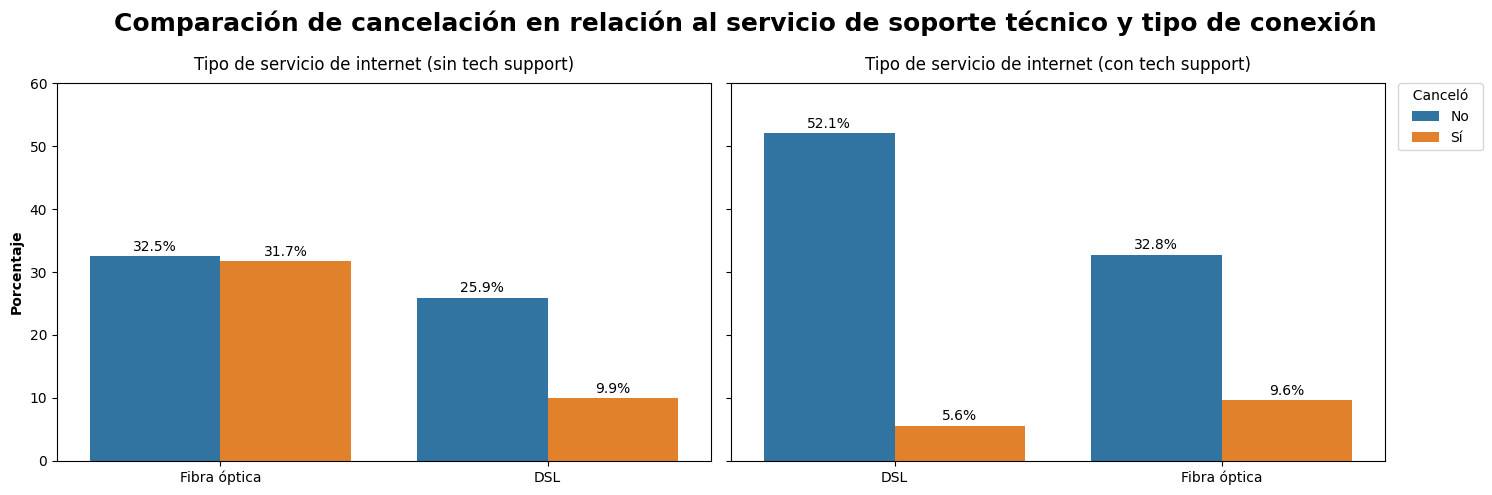

In [28]:
# Comparamos la relación de cancelación con los clientes que sí tenían tech support
fig, axs = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
plt.suptitle('Comparación de cancelación en relación al servicio de soporte técnico y tipo de conexión', fontsize=18, fontweight='bold')
# Segmentamos los clientes que no usan soporte técnico
tech_support= full_data[full_data['tech_support'] == 'No']
plot_cat(tech_support, 'internet_service', 'Tipo de servicio de internet (sin tech support)', ['Fibra óptica', 'DSL'], axs[0])
# Segmentamos los clientes que usan soporte técnico
tech_support= full_data[full_data['tech_support'] == 'Yes']
plot_cat(tech_support, 'internet_service', 'Tipo de servicio de internet (con tech support)', ['DSL', 'Fibra óptica'], axs[1])
plt.ylim(0, 60)
plt.legend(title='  Canceló  ', labels=['No', 'Sí'], bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.tight_layout()
plt.show()

En el gráfico de la derecha podemos confirmar que los clientes que utilizan el servicio de soporte técnico junto con el tipo de conexión por fibra óptica tienen una taza de cancelación mucho más baja que aquellos que no lo utilizan. Por ende, la compañía podría apalancar este servicio para retener a los clientes.

Vamos a explorar ahora las características númericas en cuanto a los cargos mensuales y totales.

##### 4.2.1.4 Exploración de características numéricas (cargos mensuales y totales) y la deserción de los clientes

In [29]:
# Distribución de cargos mensuales por tasa de cancelación
fig = px.histogram(full_data,
                   nbins=200,
                   x='monthly_charges', 
                   color='churn', 
                   labels={'monthly_charges': 'Cargos mensuales', 'churn': 'Canceló'},
                   width=800,
                   height=400,
                   color_discrete_map={1: 'orange', 0: 'steelblue'})
fig.for_each_trace(lambda x: x.update(name='Sí' if x.name == '1' else 'No'))
fig.update_layout(
    xaxis_title='<b>Monto del cargo mensual</b>', 
    yaxis_title='<b>Frecuencia</b>',
    title={'text': '<b>Distribución de cargos mensuales por tasa de cancelación</b>', 'x': 0.5, 'y': 0.93},
    barmode='stack',
    margin=dict(b=20))
fig.show()


En la gráfica podemos ver claramente que las tasas de cancelación son más elevadas conforme el monto del cargo mensual se eleva en el rango aproximado de 69 a 106. Esto podría deberse a los servicios adicionales que tienen contratados los clientes. Exploraremos la media de cargos mensuales para ver si hay alguna diferencia significativa.


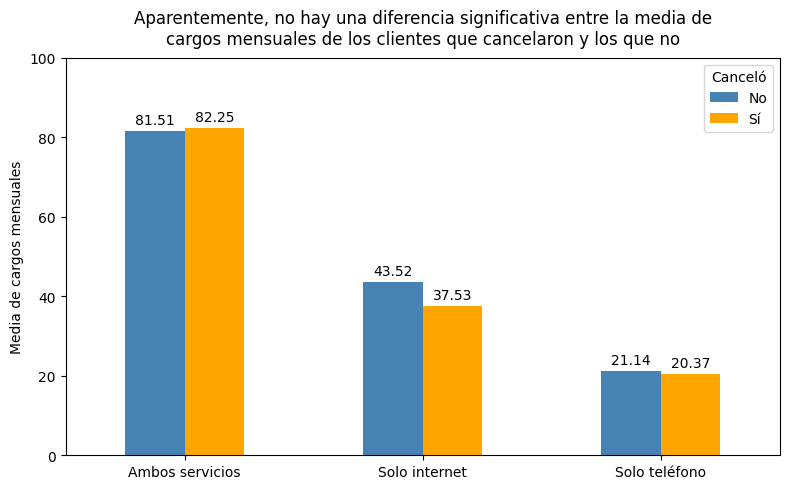

In [30]:
# Relación de clientes que cancelaron su contrato con respecto a la media de cargos mensuales por servicio básico

churn_rate_per_service = full_data.pivot_table(index='basic_services', columns='churn', values='monthly_charges', aggfunc='mean')
churn_rate_per_service.plot(kind='bar', rot=0, color=['steelblue', 'orange'], figsize=(8, 5))

plt.xticks([0, 1, 2], ['Ambos servicios', 'Solo internet', 'Solo teléfono'], rotation=0)
plt.title('Aparentemente, no hay una diferencia significativa entre la media de\ncargos mensuales de los clientes que cancelaron y los que no', pad=10)
plt.xlabel('')
plt.ylabel('Media de cargos mensuales')
plt.ylim(0, 100)
plt.legend(title='Canceló', labels=['No', 'Sí'], loc='upper right')
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.2f', padding=3)
plt.tight_layout()
plt.show()


In [31]:
# Distribución de cargos totales por tasa de cancelación
fig = px.histogram(full_data, 
                   x='total_charges',
                   nbins=80,
                   color='churn', 
                   labels={'total_charges': 'Cargos totales', 'churn': 'Canceló'},
                   width=800,
                   height=400,
                   color_discrete_map={1: 'orange', 0: 'steelblue'})
fig.for_each_trace(lambda x: x.update(name='Sí' if x.name == '1' else 'No'))
fig.update_layout(
    xaxis_title='Cargos totales', 
    yaxis_title='Frecuencia',
    title={'text': '<b>Distribución de cargos totales por tasa de cancelación</b>', 'x': 0.5, 'y': 0.93},
    barmode='stack',
    margin=dict(b=20))
fig.show()

**Este gráfico no se genera bien en la plataforma. En mi computadora se ve perfectamente bien, como el de los cargos mensuales**.

Es interesante notar que los cargos totales más bajos son los que tienen la tasa de cancelación más alta. Dado que los cargos totales se calculan desde la fecha de inicio de utilización del servicio, podemos inferir que los clientes que cancelaron son clientes relativamente nuevos. Mientras que los clientes que tienen más años con el servicio se mantienen más estables y leales. Exploraremos la antigüedad de los clientes tomando en cuenta la fecha de inicio de contratación de los servicios.

In [32]:
# Creamos una nueva columna que indique la antigüedad del cliente. 
# Debemos restar la fecha de inicio del contrato a la fecha de cancelación para los clientes que cancelaron y para los clientes
# que no cancelaron, restamos la fecha de inicio del contrato a la fecha más reciente de la base de datos, la cual es 2020-02-01

full_data['tenure'] = np.where(full_data['churn'] == 1,
                              (full_data['end_date'] - full_data['begin_date']).dt.days,
                              (pd.to_datetime('2020-02-01') - full_data['begin_date']).dt.days)
full_data['tenure'] = full_data['tenure'].astype('int16')

# Distribución de la antigüedad de los clientes por tasa de cancelación
fig = px.histogram(full_data, 
                   x='tenure', 
                   color='churn',
                   nbins=40, 
                   labels={'tenure': 'Antigüedad (días)', 'churn': 'Canceló'},
                   width=800,
                   height=400,
                   color_discrete_map={1: 'orange', 0: 'steelblue'})
fig.for_each_trace(lambda x: x.update(name='Sí' if x.name == '1' else 'No'))
fig.update_layout(
    xaxis_title='Antigüedad (días)', 
    yaxis_title='Frecuencia',
    title={'text': '<b>Distribución de la antigüedad de los clientes por tasa de cancelación</b>', 'x': 0.5, 'y': 0.93},
    barmode='stack',
    margin=dict(b=20))
fig.show()


In [33]:
# Exploramos las fechas de cancelación de los servicios

cancelled_summary = full_data[full_data['churn'] == 1].groupby('end_date')['tenure'].agg(['min', 'max']).reset_index()
cancelled_summary.columns = ['end_date', 'min_tenure', 'max_tenure']
display(cancelled_summary)


,end_date,min_tenure,max_tenure
0,2019-10-01,30,2191
1,2019-11-01,31,2161
2,2019-12-01,30,2160
3,2020-01-01,31,2191


En los gráficos anteriores podemos observar que todas las cancelaciones son de fechas recientes, es decir los últimos 4 meses previos a la fecha de obtención de la información, que es el 1 de febrero de 2020. Podemos notar en la gráfica que en la gran mayoría tiene menos de 100 días, pero también hay un grupo importante de cancelaciones con menos de 400 días.

### 4.3 Análisis de correlación entre características

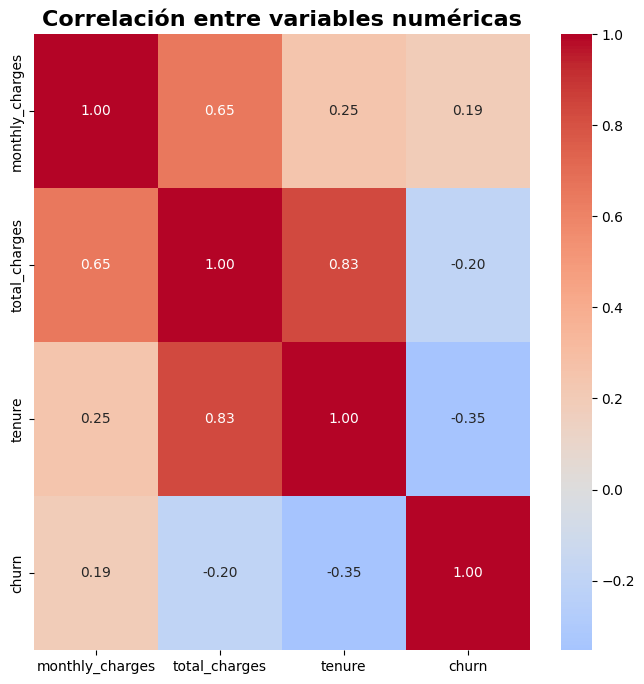

In [34]:
# Exploramos la correlación entre las variables numéricas
plt.figure(figsize=(8, 8))
sns.heatmap(full_data[['monthly_charges', 'total_charges', 'tenure', 'churn']].corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Correlación entre variables numéricas', fontsize=16, fontweight='bold')
plt.show()

En este gráfico podemos notar una correlación entre los cargos mensuales y los cargos totales, lo cual es completamente normal ya que los cargos totales son la suma de los cargos mensuales a través del periodo en que los usuarios tienen contratado el servicio. También podemos observar que no hay una correlación fuerte entre los cargos mensuales y la antigüedad pero sí hay una correlación fuerte entre los cargos totales y la antigüedad. Por último, vemos que no hay una correlación fuerte entre estas variables numéricas y nuestra variable objetivo.

### 4.4 Detección de valores atípicos

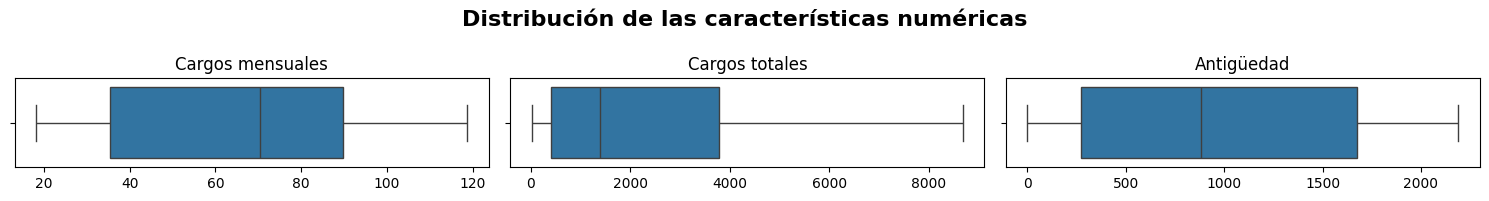

In [35]:
# Exploramos las características númericas en búsqueda de outliers
fig, axs = plt.subplots(1, 3, figsize=(15, 2), sharey=True)
plt.suptitle('Distribución de las características numéricas', fontsize=16, fontweight='bold')

sns.boxplot(data=full_data, x='monthly_charges', ax=axs[0])
axs[0].set_title('Cargos mensuales')
axs[0].set_xlabel('')
sns.boxplot(data=full_data, x='total_charges', ax=axs[1])
axs[1].set_title('Cargos totales')
axs[1].set_xlabel('')
sns.boxplot(data=full_data, x='tenure', ax=axs[2])
axs[2].set_title('Antigüedad')
axs[2].set_xlabel('')
plt.tight_layout()
plt.show()

Podemos observar en los gráficos de caja que no tenemos presencia de valores atípicos. Por lo tanto, procederemos a realizar la evaluación del balance de clases.

### 4.5 Evaluación de balance de clases

In [ ]:
# Exploramos el balance de clases en nuestra variable objetivo
class_distribution = full_data['churn'].value_counts().reset_index(name='count')
class_distribution.columns = ['churn', 'count']
class_distribution['churn'] = class_distribution['churn'].map({0: '0', 1: '1'})
fig = px.bar(class_distribution,
             x='churn', 
             y='count',
             color='churn',
             labels={'churn': 'Churn', 'count': 'Conteo'},
             width=800,
             height=400,
             color_discrete_map={'1': 'orange', '0': 'steelblue'})
#fig.for_each_trace(lambda x: x.update(name='1' if x.name == '1' else 'No'))
fig.update_layout(
    xaxis_title='Churn', 
    yaxis_title='Conteo',
    title={'text': '<b>Distribución de la variable objetivo</b>', 'x': 0.5, 'y': 0.93},
    legend_title_text='Churn',
    margin=dict(b=20))
fig.show()
print('Distribución de clases\n' ,round(full_data['churn'].value_counts(normalize=True).reset_index(name='percentage')*100, 2))

Distribución de clases
    churn  percentage
0      0       73.46
1    100       26.54


En este gráfico podemos ver que en efecto hay un desbalance de clases, siendo la clase '0' el 73.46% y la clase '1' el 26.54%. Ajustaremos el desbalance de clases utilizando la técnica de sobremuestreo para entrenar los modelos correspondientes.

## 5 Manipulación de datos e ingeniería de características

### 5.1 Codificación de variables categóricas

En esta sección haremos la preparación del dataset para la creación y prueba de diferentes modelos de ML. Para ello comenzaremos con quitar algunas características que funcionan o pueden funcionar como identificadores únicos y por tanto afectan el desempeño de los modelos de ML.

In [37]:
# Eliminamos las columnas que pueden funcionar como identificadores únicos
full_data.drop(columns=['customer_id', 'begin_date', 'end_date'], inplace=True)

Dado que tenemos una baja cardinalidad en todas las variables categóricas a transformar, utilizaremos la técnica de One Hot Encoding (OHE) que puede darnos resultados decentes en los modelos que utilizaremos. 

In [38]:
# Aplicando one hot encoding a las variables categóricas
encoded_data = pd.get_dummies(full_data, drop_first=True)
encoded_data.head()

,monthly_charges,total_charges,churn,senior_citizen,tenure,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,...,streaming_tv_Yes,streaming_movies_Sin suscripción,streaming_movies_Yes,gender_Male,partner_Yes,dependents_Yes,multiple_lines_Sin suscripción,multiple_lines_Yes,basic_services_internet,basic_services_phone
0,65.6,593.30,0,False,276,True,False,True,False,False,...,True,False,False,False,True,True,False,False,False,False
1,59.9,542.40,0,False,276,False,False,False,False,False,...,False,False,True,True,False,False,False,True,False,False
2,73.9,280.85,1,False,122,False,False,True,False,True,...,False,False,False,True,False,False,False,False,False,False
3,98.0,1237.85,1,True,396,False,False,True,False,True,...,True,False,True,True,True,False,False,False,False,False
4,83.9,267.40,1,True,91,False,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False


### 5.2 Estandarización de variables numéricas

Para evitar fuga de datos entre los conjuntos de entrenamiento y prueba, dividiremos el dataset en estos conjuntos antes de aplicar la estandarización.

In [39]:
# División de los datos en conjuntos de entrenamiento y prueba

df_train, df_test = train_test_split(encoded_data, test_size=0.2, random_state=12345, stratify=encoded_data['churn'])

# Verificamos los resultados
print(df_train.shape)
print(df_test.shape)
print(df_train['churn'].value_counts(normalize=True))
print(df_test['churn'].value_counts(normalize=True))

(5634, 32)
(1409, 32)
churn
0    0.734647
1    0.265353
Name: proportion, dtype: float64
churn
0    0.734564
1    0.265436
Name: proportion, dtype: float64


In [40]:
# Extraemos las características y la variable objetivo
X_train = df_train.drop(columns=['churn'])
y_train = df_train['churn']

X_test = df_test.drop(columns=['churn'])
y_test = df_test['churn']
# Verificamos los resultados
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(5634, 31)
(5634,)
(1409, 31)
(1409,)


In [41]:
# Utilizaremos el escalador estandar para normalizar los datos
# Separamos las columnas numéricas para aplicar el escalador
numeric = X_train.select_dtypes(include=['int16', 'float64']).columns

scaler = StandardScaler()
scaler.fit(X_train[numeric])
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

### 5.3 Creación de nuevas características (si se detectan algunas necesarias)

A lo largo de las secciones anteriores hemos analizado la información y creado algunas características como la columna 'tenure' y la columna objetivo 'churn' por lo que en este punto, ya no es necesario crear algunas otras.

En esta sección utilizaremos la técnica de sobremuestreo para ajusta el desbalance de clases.

In [42]:
# Definimos una función para hacer el sobremuestreo de los datos
def upsample(X, y, repeat, random_state=12345):
    X_zeros = X[y == 0]
    y_zeros = y[y == 0]
    X_ones = X[y == 1]
    y_ones = y[y == 1]
    
    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=random_state)
    return X_upsampled, y_upsampled

In [43]:
# Probamos el rebalanceo de clases con el método de sobremuestreo
upsample_results = {}

for repeat in [1, 2, 3, 4]:
    X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, repeat=repeat)
    shape = X_train_upsampled.shape
    proportions = y_train_upsampled.value_counts(normalize=True).sort_index()
    upsample_results[repeat] = {
        'shape': shape,
        'class_0': proportions.get(0, 0),
        'class_1': proportions.get(1, 0)}

# Crear un DataFrame para mostrar los resultados
upsample_results_df = pd.DataFrame(upsample_results)
display(upsample_results_df)


,1,2,3,4
shape,"(5634, 31)","(7129, 31)","(8624, 31)","(10119, 31)"
class_0,0.734647,0.580586,0.47994,0.409033
class_1,0.265353,0.419414,0.52006,0.590967


De los resultados de la tabla, observamos que la mejor repetición es la 2, ya que tenemos un mejor balanceo y a partir de la tercera repetición, la clase 1 se convierte en la clase mayoritaria. Por lo tanto, utilizaremos el sobremuestreo con dos repeticiones para nuestros modelos.

## 6 Modelado

En esta sección probaremos diferentes modelos de clasificación para ajustar sus hiperparámetros y finalmente probar los mejores con el conjunto de pruebas.

In [44]:
# Las siguientes funciones nos ayudarán a evaluar el rendimiento de los modelos

# Función para calcular las métricas de evaluación
def model_score(y_true, y_pred, y_pred_proba):
    roc_auc = roc_auc_score(y_true, y_pred_proba)
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return roc_auc, accuracy, precision, recall, f1

# Definimos un diccionario para almacenar los resultados de los modelos
results = {}


In [45]:
# Definimos el scorer para la validación cruzada
def cv_scorer(y_true, y_pred):
    roc_auc = roc_auc_score(y_true, y_pred)
    return roc_auc

scorer = make_scorer(cv_scorer, greater_is_better=True)


In [46]:
# Función para entrenar y evaluar los modelos sin ajuste de hiperparámetros y utilizando validación cruzada
def model_no_tuning(model_name, model, X_train, y_train, cv=5):

    # Entrenamos el modelo
    model.fit(X_train, y_train)

    # Realizamos la validación cruzada
    scores = cross_val_score(model, X_train, y_train, scoring=scorer, cv=cv)
    scores = round(scores.mean(), 4)

    # Calculamos las métricas de evaluación en el conjunto de entrenamiento
    y_pred = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_train)[:, 1]
    roc_auc, accuracy, precision, recall, f1 = model_score(y_train, y_pred, y_pred_proba)

    # Guardamos los resultados en el diccionario
    results[model_name] = {
        'roc_auc_training': scores,
        'model' : model,
        'best_params': None,
        'best_estimator': None,
        }
    
    print(f'ROC AUC de la validación cruzada: {scores}')
    print(f'Métricas para el modelo {model_name} en el conjunto de entrenamiento:')
    print(f'ROC AUC: {roc_auc:.4f}')    
    print(f'Accuracy: {accuracy:.4f}')
    print(f'Precision: {precision:.4f}')
    print(f'Recall: {recall:.4f}')
    print(f'F1 Score: {f1:.4f}')


In [47]:
# Definimos una función para entrenar y evaluar los modelos con ajuste de hiperparámetros
def model_with_tuning(model_name, model, X, y, param_grid, cv=5):
    # Realizamos la búsqueda aleatoria de hiperparámetros
    search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=20, cv=cv, scoring=scorer, n_jobs=4, verbose=0, random_state=12345)
    search.fit(X, y)
    # Guardamos los resultados en el diccionario
    results[model_name] = {
        'roc_auc_training': round(search.best_score_, 4),
        'model' : model,
        'best_params': search.best_params_,
        'best_estimator': search.best_estimator_,
        }
    # Mostramos los resultados
    print(f'Best ROC AUC: {search.best_score_:.4f}')
    print(f'Best parameters: {search.best_params_}')


### 6.1 Línea base (Dummy Classifier)

In [48]:
# Prueba de cordura con DummyClassifier
dummy_model = DummyClassifier(strategy='stratified', random_state=12345)
model_no_tuning('Dummy Classifier', dummy_model, X_train, y_train)


ROC AUC de la validación cruzada: 0.4909
Métricas para el modelo Dummy Classifier en el conjunto de entrenamiento:
ROC AUC: 0.5041
Accuracy: 0.6120
Precision: 0.2713
Recall: 0.2742
F1 Score: 0.2728


### 6.2 Regresión logística (Logistic Regression)

In [49]:
# Regresión logística sin balanceo de clases
lr_model = LogisticRegression(random_state=12345)
model_no_tuning('Logistic Regression', lr_model, X_train, y_train)

ROC AUC de la validación cruzada: 0.7204
Métricas para el modelo Logistic Regression en el conjunto de entrenamiento:
ROC AUC: 0.8456
Accuracy: 0.8060
Precision: 0.6613
Recall: 0.5512
F1 Score: 0.6012


In [50]:
# Regresión logística con balanceo de clases
lr_model = LogisticRegression(random_state=12345, class_weight='balanced')
model_no_tuning('Logistic Regression (Balanceado)', lr_model, X_train, y_train)

ROC AUC de la validación cruzada: 0.7622
Métricas para el modelo Logistic Regression (Balanceado) en el conjunto de entrenamiento:
ROC AUC: 0.8456
Accuracy: 0.7474
Precision: 0.5154
Recall: 0.8060
F1 Score: 0.6288


In [51]:
# Regresión logística con balanceo de clases mediante sobremuestreo

X_train_upsampled, y_train_upsampled = upsample(X_train, y_train, repeat=2)
lr_model = LogisticRegression(random_state=12345)
model_no_tuning(f'Logistic Regression (Balanceado por sobremuestreo)', lr_model, X_train_upsampled, y_train_upsampled)


ROC AUC de la validación cruzada: 0.7588
Métricas para el modelo Logistic Regression (Balanceado por sobremuestreo) en el conjunto de entrenamiento:
ROC AUC: 0.8457
Accuracy: 0.7627
Precision: 0.7114
Recall: 0.7304
F1 Score: 0.7208


### 6.3 Árbol de decisión (Decission Tree Classifier)

In [52]:
# Árbol de decisión sin balanceo de clases ni ajuste de hiperparámetros
dt_model = DecisionTreeClassifier(max_depth=5, random_state=12345)
model_no_tuning('Decision Tree', dt_model, X_train, y_train)

ROC AUC de la validación cruzada: 0.6916
Métricas para el modelo Decision Tree en el conjunto de entrenamiento:
ROC AUC: 0.8585
Accuracy: 0.8095
Precision: 0.6492
Recall: 0.6140
F1 Score: 0.6311


In [53]:
# Árbol de decisión con balanceo de clases por hiperparámetro

dt_model = DecisionTreeClassifier(max_depth=5, class_weight='balanced', random_state=12345)
model_no_tuning('Decision Tree (Balanceado)', dt_model, X_train, y_train)

ROC AUC de la validación cruzada: 0.7555
Métricas para el modelo Decision Tree (Balanceado) en el conjunto de entrenamiento:
ROC AUC: 0.8539
Accuracy: 0.7359
Precision: 0.5014
Recall: 0.8482
F1 Score: 0.6302


In [54]:
# Árbol de decisión con balanceo de clases mediante sobremuestreo

dt_model = DecisionTreeClassifier(max_depth=5, random_state=12345)
model_no_tuning(f'Decision Tree (Balanceado por sobremuestreo)', dt_model, X_train_upsampled, y_train_upsampled)


ROC AUC de la validación cruzada: 0.7581
Métricas para el modelo Decision Tree (Balanceado por sobremuestreo) en el conjunto de entrenamiento:
ROC AUC: 0.8513
Accuracy: 0.7683
Precision: 0.7097
Recall: 0.7572
F1 Score: 0.7327


In [55]:
# Árbol de decisión con ajuste de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],
}
dt_model = DecisionTreeClassifier(random_state=12345)
model_with_tuning('Decision Tree w/tuning', dt_model, X_train, y_train, param_grid)


Best ROC AUC: 0.7626
Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 7, 'class_weight': 'balanced'}


### 6.4 Bosque aleatorio (Random Forest Classifier)

In [56]:
# Bosque aleatorio sin balanceo de clases ni ajuste de hiperparámetros
rf_model = RandomForestClassifier(max_depth=5, random_state=12345)
model_no_tuning('Random Forest', rf_model, X_train, y_train)

ROC AUC de la validación cruzada: 0.679
Métricas para el modelo Random Forest en el conjunto de entrenamiento:
ROC AUC: 0.8615
Accuracy: 0.8055
Precision: 0.7372
Recall: 0.4147
F1 Score: 0.5308


In [57]:
# Bosqe aleatorio con balanceo de clases por hiperparámetro
rf_model_b = RandomForestClassifier(max_depth=5, random_state=12345, class_weight='balanced')
model_no_tuning('Random Forest (Balanceado)', rf_model_b, X_train, y_train)

ROC AUC de la validación cruzada: 0.768
Métricas para el modelo Random Forest (Balanceado) en el conjunto de entrenamiento:
ROC AUC: 0.8596
Accuracy: 0.7524
Precision: 0.5211
Recall: 0.8254
F1 Score: 0.6389


In [58]:
# Bosque aleatorio con balanceo de clases mediante sobremuestreo

rf_model = RandomForestClassifier(max_depth=5, random_state=12345)
model_no_tuning(f'Random Forest (Balanceado por sobremuestreo)', rf_model, X_train_upsampled, y_train_upsampled)


ROC AUC de la validación cruzada: 0.7675
Métricas para el modelo Random Forest (Balanceado por sobremuestreo) en el conjunto de entrenamiento:
ROC AUC: 0.8607
Accuracy: 0.7844
Precision: 0.7455
Recall: 0.7378
F1 Score: 0.7416


In [59]:
# Bosque aleatorio con ajuste de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 9, 11],
    'n_estimators': [10, 50, 80, 100],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': ['balanced'],
}
rf_model = RandomForestClassifier(random_state=12345)
model_with_tuning('Random Forest w/tuning', rf_model, X_train, y_train, param_grid)

Best ROC AUC: 0.7715
Best parameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 7, 'class_weight': 'balanced'}


Con estos tres primeros modelos estamos obteniendo valores relativamente bajos para la métrica ROC AUC en la validación cruzada. Pasaremos ahora a probar modelos basados en el decenso de gradiente.

### 6.5 XGBoost

In [60]:
# XGBoost sin ajuste de hiperparámetros
xgb_model = XGBClassifier(random_state=12345)
model_no_tuning('XGBoost', xgb_model, X_train_upsampled, y_train_upsampled)


ROC AUC de la validación cruzada: 0.8884
Métricas para el modelo XGBoost en el conjunto de entrenamiento:
ROC AUC: 0.9943
Accuracy: 0.9625
Precision: 0.9413
Recall: 0.9712
F1 Score: 0.9560


In [61]:
# XGBoost con ajuste de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [10, 50, 80, 100, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'reg_lambda': [0, 0.1, 1],
    'reg_alpha': [0, 0.1, 1],
}
xgb_model = XGBClassifier(random_state=12345)
model_with_tuning('XGBoost w/tuning', xgb_model, X_train_upsampled, y_train_upsampled, param_grid)

Best ROC AUC: 0.9056
Best parameters: {'subsample': 1.0, 'reg_lambda': 0.1, 'reg_alpha': 0.1, 'n_estimators': 300, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.7}


### 6.6 CatBoost

In [62]:
# Obtenemos la lista de características categóricas
cat_features = full_data.select_dtypes(include=['object', 'bool']).columns.tolist()
cat_train, cat_test = train_test_split(full_data, test_size=0.2, random_state=12345, stratify=full_data['churn'])

# Definimos las características y la variable objetivo
X_cat_train = cat_train.drop(columns=['churn'])
y_cat_train = cat_train['churn']
X_cat_test = cat_test.drop(columns=['churn'])
y_cat_test = cat_test['churn']

numeric = X_cat_train.select_dtypes(include=['int16', 'float64']).columns

scaler = StandardScaler()
scaler.fit(X_cat_train[numeric])
X_cat_train[numeric] = scaler.transform(X_cat_train[numeric])
X_cat_test[numeric] = scaler.transform(X_cat_test[numeric])
class_count = y_cat_train.value_counts()
display(X_cat_train.head())

,type,paperless_billing,payment_method,monthly_charges,total_charges,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,gender,senior_citizen,partner,dependents,multiple_lines,basic_services,tenure
1227,Month-to-month,No,Mailed check,-1.176753,-0.987300,DSL,No,No,No,Yes,No,No,Male,False,No,No,Sin suscripción,internet,-1.274839
3585,Month-to-month,Yes,Electronic check,-0.641323,-0.980182,DSL,No,No,No,No,No,No,Female,False,No,No,No,both,-1.276176
3920,Month-to-month,Yes,Electronic check,0.979884,-0.539108,Fiber optic,No,No,No,No,Yes,Yes,Female,False,No,No,Yes,both,-0.828315
423,Two year,Yes,Mailed check,-1.161834,-0.868349,DSL,No,No,No,Yes,No,No,Female,False,No,No,Sin suscripción,internet,-0.907192
6829,Month-to-month,No,Mailed check,-1.480107,-0.985735,Sin suscripción,Sin suscripción,Sin suscripción,Sin suscripción,Sin suscripción,Sin suscripción,Sin suscripción,Male,False,No,No,No,phone,-1.233396


In [63]:
# CatBoost sin ajuste de hiperparámetros
cat_model = CatBoostClassifier(cat_features=cat_features, scale_pos_weight=(class_count[0] / class_count[1]), random_state=12345, verbose=0)
model_no_tuning('CatBoost', cat_model, X_cat_train, y_cat_train)

ROC AUC de la validación cruzada: 0.7962
Métricas para el modelo CatBoost en el conjunto de entrenamiento:
ROC AUC: 0.9386
Accuracy: 0.8550
Precision: 0.6744
Recall: 0.8769
F1 Score: 0.7624


In [64]:
# CatBoost con ajuste de hiperparámetros
param_grid = {
    'depth': [3, 5, 7, 9],
    'iterations': [50, 80, 100, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'l2_leaf_reg': [0, 0.1, 1],
    'scale_pos_weight': [2, (class_count[0] / class_count[1]), 3],
}
cat_model = CatBoostClassifier(cat_features=cat_features, random_state=12345, verbose=0)
model_with_tuning('CatBoost w/tuning', cat_model, X_cat_train, y_cat_train, param_grid)

Best ROC AUC: 0.8372
Best parameters: {'scale_pos_weight': np.float64(2.768561872909699), 'learning_rate': 0.2, 'l2_leaf_reg': 0, 'iterations': 300, 'depth': 3}


In [65]:
# CatBoost con ajuste de hiperparámetros
param_grid = {
    'depth': [3, 5, 7, 9],
    'iterations': [50, 80, 100, 300],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'l2_leaf_reg': [0, 0.1, 1],
    'scale_pos_weight': [2, (class_count[0] / class_count[1]), 3],
}
cat_model = CatBoostClassifier(random_state=12345, verbose=0)
model_with_tuning('CatBoost w/tuning upsampled', cat_model, X_train_upsampled, y_train_upsampled, param_grid)

Best ROC AUC: 0.8921
Best parameters: {'scale_pos_weight': np.float64(2.768561872909699), 'learning_rate': 0.3, 'l2_leaf_reg': 0, 'iterations': 300, 'depth': 9}


### 6.7 LightGBM

In [66]:
# changing the dtypes to 'category'
X_cat_lgbm_train = X_cat_train.copy()
X_cat_lgbm_test = X_cat_test.copy()
X_cat_lgbm_train[cat_features] = X_cat_lgbm_train[cat_features].astype('category')
X_cat_lgbm_test[cat_features] = X_cat_lgbm_test[cat_features].astype('category')

# LGBM sin ajuste de hiperparámetros
lgbm_model = LGBMClassifier(class_weight='balanced', random_state=12345, verbose=0)
model_no_tuning('LGBM', lgbm_model, X_cat_lgbm_train, y_cat_train)

ROC AUC de la validación cruzada: 0.7992
Métricas para el modelo LGBM en el conjunto de entrenamiento:
ROC AUC: 0.9765
Accuracy: 0.9095
Precision: 0.7655
Recall: 0.9498
F1 Score: 0.8478


In [67]:
# LGBM con ajuste de hiperparámetros
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3, 0.6],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'reg_lambda': [1],
    'reg_alpha': [1],
    'num_leaves': [32, 64, 128],
    'min_data_in_leaf': [20, 40, 60]
}
lgbm_model = LGBMClassifier(class_weight='balanced', verbose=0, verbosity=-1, random_state=12345)
model_with_tuning('LGBM w/tuning', lgbm_model, X_cat_lgbm_train, y_cat_train, param_grid)

Best ROC AUC: 0.8195
Best parameters: {'subsample': 0.5, 'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 32, 'n_estimators': 300, 'min_data_in_leaf': 20, 'max_depth': 3, 'learning_rate': 0.3, 'colsample_bytree': 0.5}


In [68]:
# LGBM con ajuste de hiperparámetros y balanceo por sobremuestreo
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'n_estimators': [50, 100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3, 0.6],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'reg_lambda': [1],
    'reg_alpha': [1],
    'num_leaves': [32, 64, 128],
    'min_data_in_leaf': [20, 40, 60]
}
lgbm_model = LGBMClassifier(verbose=0, verbosity=-1, random_state=12345)
model_with_tuning('LGBM w/tuning upsampled', lgbm_model, X_train_upsampled, y_train_upsampled, param_grid)

Best ROC AUC: 0.9040
Best parameters: {'subsample': 0.7, 'reg_lambda': 1, 'reg_alpha': 1, 'num_leaves': 64, 'n_estimators': 500, 'min_data_in_leaf': 20, 'max_depth': 5, 'learning_rate': 0.6, 'colsample_bytree': 0.7}


En general, podemos ver que los modelos CatBoost y LGBM se desempeñan mejor, en este caso, utilizando los datasets con las variables categóricas ya codificadas y utilizando el sobremuestreo para el balanceo de clases.

## 7 Evaluación
En esta sección, evaluaremos los 3 mejores modelos obtenidos y seleccionaremos el que tenga un mejor desempeño en el conjunto de prueba.

### 7.1 Evaluación de los 3 mejores modelos en el conjunto de prueba

In [69]:
# Presentamos los resultados de los modelos
results_df = pd.DataFrame.from_dict(results)
results_df = results_df.T
results_df = results_df.sort_values(by='roc_auc_training', ascending=False)
display(results_df[['roc_auc_training']].head(10))

,roc_auc_training
XGBoost w/tuning,0.9056
LGBM w/tuning upsampled,0.904
CatBoost w/tuning upsampled,0.8921
XGBoost,0.8884
CatBoost w/tuning,0.8372
LGBM w/tuning,0.8195
LGBM,0.7992
CatBoost,0.7962
Random Forest w/tuning,0.7715
Random Forest (Balanceado),0.768


In [70]:
# Probamos los 3 mejores modelos en el conjunto de pruebas y guardamos los resultados
# Definimos un diccionario para guardar los resultados 
final_results = {}

# Realizamos las predicciones y calculamos las métricas de evaluación
for model_name, model in results_df.iloc[:3]['best_estimator'].items():
    
    # Realizamos la predicción
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Calculamos las métricas de evaluación
    roc_auc, accuracy, precision, recall, f1 = model_score(y_test, y_pred, y_pred_proba)
    
    # Guardamos los resultados en el diccionario
    final_results[model_name] = {
        'roc_auc': roc_auc,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        }

In [71]:
# Presentamos los resultados finales
final_results_df = pd.DataFrame.from_dict(final_results)
final_results_df = final_results_df.T
final_results_df = final_results_df.sort_values(by='roc_auc', ascending=False)
final_results_df.columns = ['ROC AUC', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
display(final_results_df.round(4))

,ROC AUC,Accuracy,Precision,Recall,F1 Score
LGBM w/tuning upsampled,0.9152,0.8566,0.7275,0.7353,0.7314
XGBoost w/tuning,0.9144,0.8623,0.7394,0.7433,0.7413
CatBoost w/tuning upsampled,0.8623,0.8275,0.6866,0.6444,0.6648


### 7.2 Selección del mejor modelo

Podemos ver que el mejor modelo es el LGBM utilizando el conjunto de entrenamiento con las variables categóricas ya codificadas y el balanceo de clases mediante sobremuestreo, obteniendo un 0.92 en la métrica ROC AUC y una exactitud de 0.86. Ahora veremos la curva ROC e intentaremos mejorar la métrica F1 Score mediante el ajuste del umbral de corte.

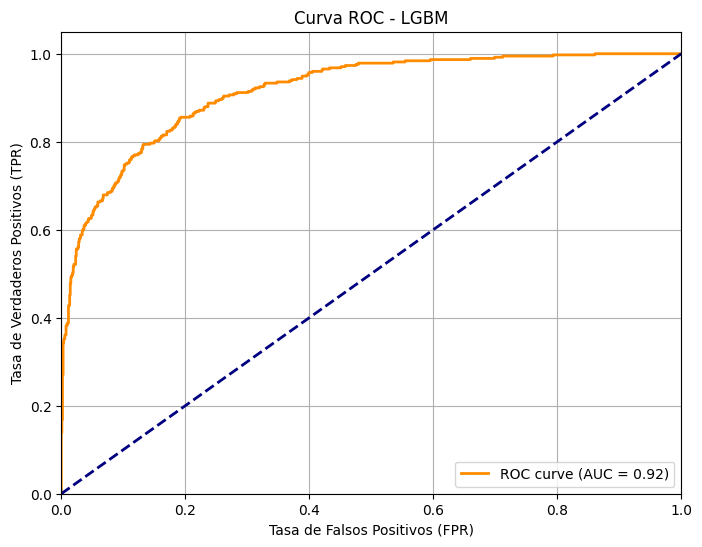

In [72]:
# Obtener el modelo entrenado
lgbm_best = results['LGBM w/tuning upsampled']['best_estimator']

# Predecir probabilidades para la clase positiva
y_pred_proba = lgbm_best.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.title('Curva ROC - LGBM')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Mejor umbral: 0.48
F1 Score máximo: 0.7368
Accuracy: 0.8581
Precision: 0.7254
Recall: 0.7487
ROC AUC: 0.9152


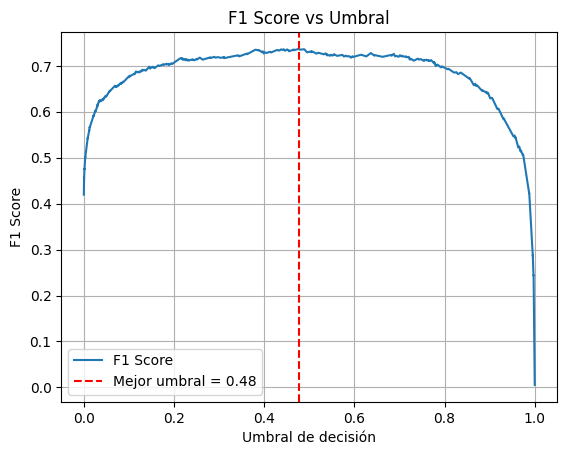

In [73]:
# Ajustar el umbral de corte
# Calcular métricas para cada umbral
f1_scores = [f1_score(y_test, y_pred_proba >= t) for t in thresholds]
# Encontrar el mejor umbral según el F1 Score
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]
print(f"Mejor umbral: {best_threshold:.2f}")
print(f"F1 Score máximo: {best_f1:.4f}")
# Calculamos las otras métricas en ese umbral
y_pred_opt = (y_pred_proba >= best_threshold).astype(int)
print("Accuracy:", round(accuracy_score(y_test, y_pred_opt), 4))
print("Precision:", round(precision_score(y_test, y_pred_opt), 4))
print("Recall:", round(recall_score(y_test, y_pred_opt), 4))
print("ROC AUC:", round(roc_auc_score(y_test, y_pred_proba), 4))  # no cambia
# Graficamos el F1 Score vs umbral
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Mejor umbral = {best_threshold:.2f}')
plt.xlabel('Umbral de decisión')
plt.ylabel('F1 Score')
plt.title('F1 Score vs Umbral')
plt.legend()
plt.grid(True)
plt.show()

Como podemos observar la mejora en las métricas cambiando el umbral de corte para la métrica F1 score es realmente mínimo, aún así tenemos una buena métrica ROC AUC que indica que el modelo podrá ayudar a la compañía a identificar y tratar de retener a los clientes que están próximos a cancelar sus contratos.

## 8 Conclusiones generales

En este proyecto para la compañía de telecomunicaciones Interconnect, se realizaron tareas de clasificación para desarrollar modelos de machine learning que tuvieran la capacidad de predecir la deserción de los clientes basado en datos históricos proporcionados por el equipo de marketing. De manera general, a continuación podemos describir algunos hallazgos importantes durante las diferentes etapas del proyecto y estos se detallarán en el informe final.

1. Exploración inicial de los datos.
Se revisó la estructura inicial de los 4 archivos proporcionados por la compañía con la información histórica de los clientes, encontrando algunos valores ausentes en la columna `total_charges` y se corrigieron mediante la asignación de los valores presentes en la columna `monthly_charges`. Se encontraron también valores ausentes en cuanto a los servicios que tenía contratado cada cliente y estos debido a la naturaleza de recolección de los mismos. Se abordó esta situación en la etapa siguiente.
Se corrigieron los nombres de todas las columnas para dejarlos en el formato "snake_case" y se corrigieron los tipos de datos para las columnas de fechas.
2. Análsis exploratorio de datos (EDA).
En esta etapa se unificaron los archivos en un solo conjunto de datos, se abordaron los valores ausentes de los registros de servicios de internet y teléfono y se creó una nueva columna que consolidara de manera clara la información de los dos servicios para cada cliente. Se analizaron las estadísticas principales de cada característica encontrando patrones de deserción en algunos rubros, podemos destacara brevemente los cargos totales, cargos mensuales y el uso del servicio de fibra óptica, aunque en este último también se detectó que había una incidencia más baja cuando se tenía contratado el servicio de soporte técnico.
3. Manipulación de datos.
En esta etapa se realizó la codificación de variables categóricas con la técnica "one hot encoding" y se estandarizaron las variables númericas. También se abordó el desbalance de clases utilizando la técnica de sobremuestreo.
4. Modelado.
En esta etapa se probaron diferentes modelos de clasificación y se ajustaron los hiperparámetros de los mismos para buscar el valor más alto en la métrica ROC AUC.
5. Evaluación.
En esta etapa se evaluaron los 3 mejores modelos identificados de la etapa anterior. Dicha evaluación se realizó en el conjunto de pruebas y se obtuvo una métrica de **0.9152 de ROC AUC** y mediante el ajuste del umbral de corte se mejoraron ligeramente las métricas de exactitud, sensibilidad y presición. Por lo que el mejor modelo y por tanto seleccionado es el LGBM.

Con este modelo, la compañía podría anticipar las campañas del equipo de marketing para ofrecer promociones especiales a sus clientes y con ello tratar de retenerlos, aumentando así las ganancias de la compañía.

# Informe de solución:

El presente proyecto fue estructurado mediante un Plan de Trabajo que se detalla en la sección 2.1 y fue basado en la metodología CRISP_DM. Los pasos clave para el desarrollo de este proyecto incluyeron: Exploración inicial de los datos, Análisis exploratorio de Datos (EDA), Manipulación de datos e Ingeniería de Características, Modelado y Evaluación. 

El plan fue desarrollado previo a comenzar con cualquier tarea del proyecto. Como en cualquier proyecto, es escencial tener un plan de trabajo bien establecido pero que a la vez permita flexibilidad para abordar los problemas encontrados durante la ejecución del proyecto. En este sentido, podemos comentar que todos los pasos del plan fueron ejecutados correctamente con ligeras adaptaciones. En este caso, el punto 3.3 Creación de nuevas características no fue realizado como inicialmente se planteó ya que se detectó la necesidad de crear estas características durante la ejecución de la etapa previa (Análisis exploratorio de los datos (EDA)). Las nuevas características fueron también analizadas con el conjunto de datos original y permitieron obtener hallazgos importantes.

Durante la ejecución del proyecto, enfrentamos algunas dificultades relacionadas con el desbalance de clases. Se utilizó la técnica de sobremuestreo para ajustar el desbalance de clases y se obtuvieron resultados favorables. Algunos modelos tienen la capacidad de hacer este balance de clases como parte de su algoritmo interno, por lo que también se probaron, encontrando que en algunos casos, el balanceo por sobremuestreo producía mejores resultados y más rápidos. La misma situación se encontró con las variables categóricas, que en modelos como CatBoost y LGBM se pueden manejar internamente, sin embargo, en este caso, los modelos tomaban más tiempo para el entrenamiento y producían resultados inferiores a los obtenidos con el conjunto de datos tratados por One-hot-enconding (OHE) y sobremuestreo. 

Adicional a estos retos, el ajuste de hiperparámetros, supuso también un reto, ya que el encontrar los rangos óptimos para muchos de ellos es una tarea que consume tiempo, en este caso se utilizó la clase `RandomizedSearchCV` para optimizar el tiempo en la búsqueda de estos hiperparámetros.

Como resultado de estas exploraciones, se encontró que el modelo que producía los mejores resultados es el LightGBM utilizando el conjunto de datos balanceado mediante sobremuestreo y con codificación OHE para variables categóricas. Obteniendo un resultado final de **ROC AUC: 0.9152** y **Exactitud: 0.8581**.

Con estos resultados, la compañía puede aprovechar los hallazgos encontrados en el análisis exploratorio de datos (EDA) y los resultados de predicción del modelo para ofrecer a estos clientes clave promociones especiales y tratar de retenerlos a la vez que se trabaja para mejorar su experiencia utilizando los servicios de la compañía.

